## DATA SCIENCE TECHNICAL ASSESSMENT- (Fake_Job_Postings)

### Table of Contents
#### -Introduction

#### -Data Wrangling

#### -Data Cleaning

#### -Exploratory Data Analysis

Research Question: Which industry has the highest number of fake job postings?

#### -Conclusion

### Introduction

#### Data Description

In this section, I will be analyzing the information gathered from a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs. A number red flags shows how unauthentic these job postings may be, and I would like to study and identify them. [Dataset Source](/intermediate/fake_job_postings.csv)}

#### Research Question:
--- Which industry has the highest number of fake job postings?


In [1]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Wrangling

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/she-code-africa/SCAMP-Cohort6-Technical-Assessment/master/intermediate/fake_job_postings.csv')

In [4]:
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [5]:
# To obtain the general information of the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# To get the number of rows and columns
df.shape

(17880, 18)

The above dataset contains 17880 rows and 18 columns. Only about 6 columns have a complete entry, including job_id, title,telecommuting, has_company_logo,has_questions and fraudulent. Since we are interested with the industry with the highest number of fake job posting, we will drop all columns without any industry entry.

### Data Cleaning

In [7]:
# remove nan values in industry column
df.dropna(subset='industry', inplace=True)

In [8]:
# To confirm current number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12977 entries, 1 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               12977 non-null  int64 
 1   title                12977 non-null  object
 2   location             12879 non-null  object
 3   department           4701 non-null   object
 4   salary_range         2735 non-null   object
 5   company_profile      10858 non-null  object
 6   description          12977 non-null  object
 7   requirements         11659 non-null  object
 8   benefits             8509 non-null   object
 9   telecommuting        12977 non-null  int64 
 10  has_company_logo     12977 non-null  int64 
 11  has_questions        12977 non-null  int64 
 12  employment_type      12686 non-null  object
 13  required_experience  10190 non-null  object
 14  required_education   9235 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:
# To check for unique values in fraudulent
print(df.fraudulent.unique(), '-----fraudulent')

[0 1] -----fraudulent


In [10]:
# To know the sum of each unique values
df.fraudulent.value_counts()

0    12386
1      591
Name: fraudulent, dtype: int64

The above codes shows that there are a total of 591 fraudulent job postings and 12386 genuine jobs. So I will like to drop all columns that are not fraudulent and focus on the fraudulent ones only, as specified in this reserch question.

In [11]:
# Drop rows with 0 in fraudulent column
df.drop(df.loc[df['fraudulent']==0].index, inplace=True)

In [12]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 98 to 17830
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               591 non-null    int64 
 1   title                591 non-null    object
 2   location             584 non-null    object
 3   department           254 non-null    object
 4   salary_range         219 non-null    object
 5   company_profile      245 non-null    object
 6   description          591 non-null    object
 7   requirements         504 non-null    object
 8   benefits             384 non-null    object
 9   telecommuting        591 non-null    int64 
 10  has_company_logo     591 non-null    int64 
 11  has_questions        591 non-null    int64 
 12  employment_type      558 non-null    object
 13  required_experience  400 non-null    object
 14  required_education   384 non-null    object
 15  industry             591 non-null    object
 16  funct

It's pretty okay if some of the columns have null cells because its possible to post job vacancies without all attributes. Now the dataset looks clean an set for analysis!

### Exploratory Data Analysis
#### Research Question: Which industry has the highest number of fake job postings?

In [13]:
# To know the count of each industry
df.industry.value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

In [14]:
import numpy as np
import matplotlib.pyplot as plt

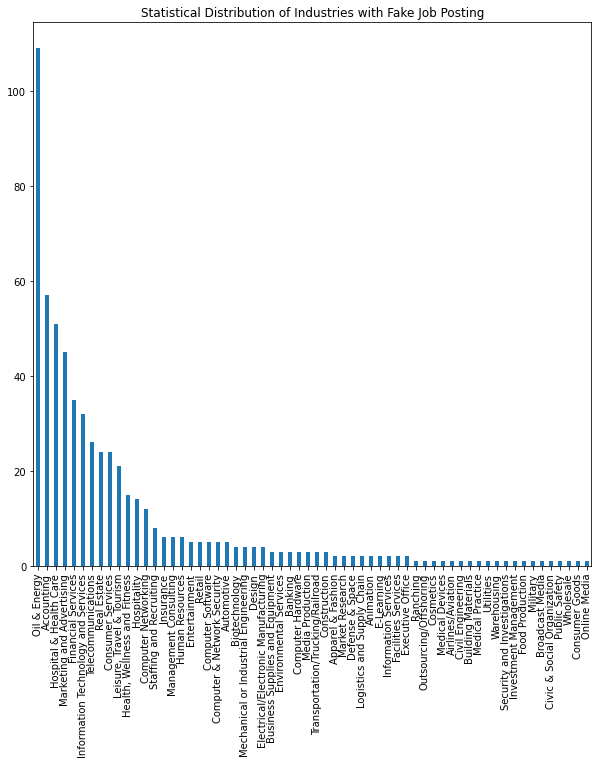

In [15]:
df.industry.value_counts().plot(kind='bar', figsize=(10,10), title='Statistical Distribution of Industries with Fake Job Posting');

Bravo! Out of the 591 fake job postings,the industry with the highest fake job posting is the 'Oil and Energy', with a total of 109.

### Conclusion

Out of the original 17880 data entries, there was 591 fake job postings and the Oil and Energy industry happen to have the highest fake posting with a total of 109. 